In [ ]:
!pip install "gymnasium[atari]"
!pip install autorom[accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=autorom_accept_rom_license-0.6.1-py3-none-any.whl size=446711 sha256=f2bc7620963ec4d5045aecc7cd4e100025d4a84a488b172dc5cee3323aa9c58e
  Stored in directory: /root/.cache/pip/wheels/bc/fc/c6/8aa657c0d2089982f2dabd110efc68c61eb49831fdb7397351
Successfully built AutoROM.accept-rom-license


In [ ]:
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import torch
import imageio
from moviepy.editor import *
import os
from PIL import Image
import cv2
from IPython.display import Video, clear_output, display

gym.register_envs(ale_py)

In [ ]:
env = gym.make("ALE/Assault-v5", render_mode = 'rgb_array')

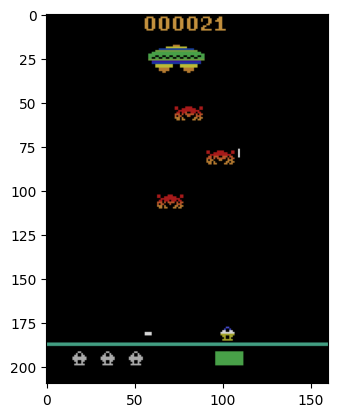

In [ ]:
# Привести среду в исходное состояние перед началом
env.reset()

# Нарисовать первоначальное состояние игры
prev_screen = env.render()
plt.imshow(prev_screen)

# повторять 50 раз
for i in range(50):
  # предпринять случайное действие
  action = env.action_space.sample()
  obs, reward, done, truncated, info = env.step(action) # в более ранних версиях Gym возвращает 4 параметра

  # Нарисовать первоначальное состояние игры
  screen = env.render()
  plt.imshow(screen)

  # Очищаем вывод ячейки
  ipythondisplay.clear_output(wait=True)

  # Отрисовываем текущую фигуру
  ipythondisplay.display(plt.gcf())

  # Если шаг привел к завершению игры
  if done or truncated:
    break

# Очищаем вывод ячейки
ipythondisplay.clear_output(wait=True)

# Закрыть окружающую среду
env.close()

In [ ]:
# создать и инициализировать окружающую среду
env.reset()

# список из вознаграждений
total_rewards = []
# сыграть 10 игр
n_episode = 10

for i in range(n_episode):
    # инициализировать переменные
    game_rew = 0
    while True:
        # выбрать случайное действие
        action = env.action_space.sample()
        # выполнить один шаг взаимодействия с окружающей средой
        new_obs, rew, done, truncated, _ = env.step(action)
        game_rew += rew

        # если завершено, напечатать полное вознаграждение в игре и сбросить среду
        if done or truncated:
            print('Эпизод %d завершен, Вознаграждение:%d' % (i, game_rew))
            env.reset()
            break
    total_rewards.append(game_rew)


Эпизод 0 завершен, Вознаграждение:273
Эпизод 1 завершен, Вознаграждение:336
Эпизод 2 завершен, Вознаграждение:189
Эпизод 3 завершен, Вознаграждение:294
Эпизод 4 завершен, Вознаграждение:189
Эпизод 5 завершен, Вознаграждение:189
Эпизод 6 завершен, Вознаграждение:252
Эпизод 7 завершен, Вознаграждение:147
Эпизод 8 завершен, Вознаграждение:189
Эпизод 9 завершен, Вознаграждение:231


In [ ]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(
          n_episode, sum(total_rewards) / n_episode))

Среднее полное вознаграждение в 10 эпизодах: 228.9


In [ ]:
n_state = np.prod(env.observation_space.shape)  # Размерность состояния
n_action = env.action_space.n  # Количество действий
print(n_state,n_action )
n_episodes = 50
best_total_reward = 0
best_weight = None
total_rewards = []

100800 7


In [ ]:
def run_episode(env, weight, record_frames=False):
    state = env.reset()[0]
    state = torch.from_numpy(state.flatten()).float()
    total_reward = 0
    frames = []
    while True:
        if record_frames:
              # Получаем текущий кадр игры
              frame = env.render()
              frames.append(frame)

        # Вычисляем линейную комбинацию с весами
        action_scores = torch.matmul(state, weight)  # Результат будет иметь размерность (n_action,)
        action = torch.argmax(action_scores).item()  # Выбираем действие с максимальным значением

        # Выполняем шаг
        state, reward, done, truncated, _ = env.step(action)
        state = torch.from_numpy(state.flatten()).float()  # Преобразуем новое состояние
        total_reward += reward

        if done or truncated:
            break

    return total_reward, frames

In [ ]:
# Функция для записи видео
def save_video(frames, output_file, fps=30):
    print(f"Запись видео: {output_file}")
    imageio.mimsave(output_file, frames, fps=fps)
    print(f"Видео сохранено: {output_file}")

In [ ]:
for episode in range(n_episodes):
    weight = torch.rand(n_state, n_action)  # Случайные веса
    total_reward, _ = run_episode(env, weight, record_frames=False)
    print(f'Эпизод {episode+1}: Вознаграждение = {total_reward}')

    if total_reward > best_total_reward:
        best_weight = weight
        best_total_reward = total_reward

    total_rewards.append(total_reward)

# Закрыть окружающую среду
env.close()

# Вывод результатов
print(f"Лучшее вознаграждение: {best_total_reward}")

Эпизод 1: Вознаграждение = 315.0
Эпизод 2: Вознаграждение = 63.0
Эпизод 3: Вознаграждение = 294.0
Эпизод 4: Вознаграждение = 525.0
Эпизод 5: Вознаграждение = 378.0
Эпизод 6: Вознаграждение = 189.0
Эпизод 7: Вознаграждение = 672.0
Эпизод 8: Вознаграждение = 21.0
Эпизод 9: Вознаграждение = 84.0
Эпизод 10: Вознаграждение = 84.0
Эпизод 11: Вознаграждение = 462.0
Эпизод 12: Вознаграждение = 63.0
Эпизод 13: Вознаграждение = 273.0
Эпизод 14: Вознаграждение = 0.0
Эпизод 15: Вознаграждение = 0.0
Эпизод 16: Вознаграждение = 105.0
Эпизод 17: Вознаграждение = 0.0
Эпизод 18: Вознаграждение = 21.0
Эпизод 19: Вознаграждение = 462.0
Эпизод 20: Вознаграждение = 0.0
Эпизод 21: Вознаграждение = 0.0
Эпизод 22: Вознаграждение = 189.0
Эпизод 23: Вознаграждение = 0.0
Эпизод 24: Вознаграждение = 399.0
Эпизод 25: Вознаграждение = 399.0
Эпизод 26: Вознаграждение = 210.0
Эпизод 27: Вознаграждение = 378.0
Эпизод 28: Вознаграждение = 210.0
Эпизод 29: Вознаграждение = 168.0
Эпизод 30: Вознаграждение = 294.0
Эпизод 

In [ ]:
n_episode_eval = 10
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, _ = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    total_rewards_eval.append(total_reward)

Эпизод 1: 462.0
Эпизод 2: 609.0
Эпизод 3: 273.0
Эпизод 4: 210.0
Эпизод 5: 546.0
Эпизод 6: 588.0
Эпизод 7: 462.0
Эпизод 8: 609.0
Эпизод 9: 609.0
Эпизод 10: 588.0


In [ ]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(
          n_episode_eval, sum(total_rewards_eval) / n_episode_eval))

Среднее полное вознаграждение в 10 эпизодах: 495.6


In [ ]:
len(total_rewards_eval)

10

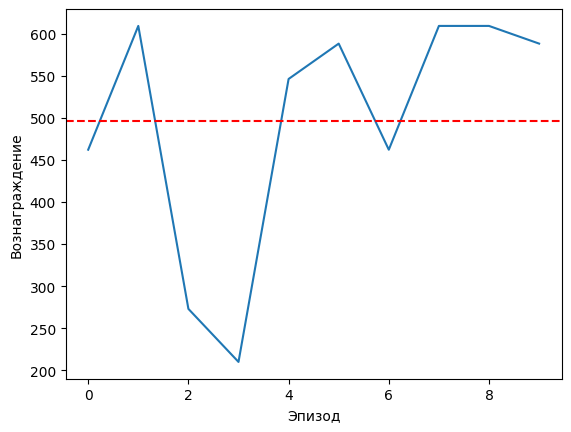

In [ ]:
plt.plot(total_rewards_eval)
mean_reward = sum(total_rewards_eval) / n_episode_eval
plt.axhline(mean_reward, color='red', linestyle='--')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [ ]:
_, frames = run_episode(env, best_weight, record_frames=True)  # Извлекаем frames


In [ ]:
output_file = "best_episode_1.mp4"
save_video(frames, output_file, fps=30)
path="/content/best_episode_1.mp4"
clip=VideoFileClip(path)
clip.ipython_display(width=480, maxduration=180)

Запись видео: best_episode_1.mp4
Видео сохранено: best_episode_1.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


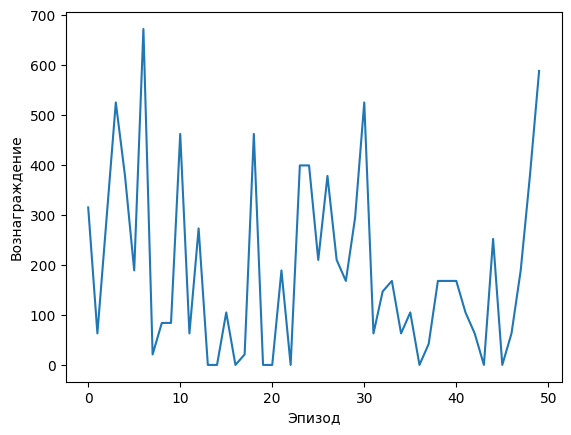

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

# Алгоритм восхождения на вершину

In [ ]:
env.reset()
n_state = np.prod(env.observation_space.shape)  # Размерность состояния
n_action = env.action_space.n  # Количество действий
print(n_state,n_action )
n_episodes = 50
best_total_reward = 0
best_weight = torch.rand(n_state, n_action)
total_rewards = []
noise_scale = 0.01

100800 7


In [ ]:
for episode in range(n_episodes):
    # Генерация весов: лучшие веса + случайный шум
    weight = best_weight + noise_scale * torch.rand(n_state, n_action)
    total_reward, _ = run_episode(env, weight, record_frames=False)

    if total_reward > best_total_reward:
        best_total_reward = total_reward
        best_weight = weight
        print(f'для отладки рейтинга: {best_total_reward}')

    total_rewards.append(total_reward)
    print(f'Эпизод {episode + 1}: Вознаграждение = {total_reward}')

для отладки рейтинга: 567.0
Эпизод 1: Вознаграждение = 567.0
Эпизод 2: Вознаграждение = 567.0
Эпизод 3: Вознаграждение = 210.0
для отладки рейтинга: 630.0
Эпизод 4: Вознаграждение = 630.0
Эпизод 5: Вознаграждение = 399.0
Эпизод 6: Вознаграждение = 378.0
Эпизод 7: Вознаграждение = 294.0
Эпизод 8: Вознаграждение = 336.0
Эпизод 9: Вознаграждение = 357.0
Эпизод 10: Вознаграждение = 546.0
Эпизод 11: Вознаграждение = 399.0
Эпизод 12: Вознаграждение = 420.0
Эпизод 13: Вознаграждение = 441.0
Эпизод 14: Вознаграждение = 357.0
Эпизод 15: Вознаграждение = 273.0
Эпизод 16: Вознаграждение = 315.0
Эпизод 17: Вознаграждение = 273.0
Эпизод 18: Вознаграждение = 210.0
Эпизод 19: Вознаграждение = 336.0
Эпизод 20: Вознаграждение = 294.0
Эпизод 21: Вознаграждение = 336.0
Эпизод 22: Вознаграждение = 546.0
Эпизод 23: Вознаграждение = 399.0
Эпизод 24: Вознаграждение = 483.0
Эпизод 25: Вознаграждение = 189.0
Эпизод 26: Вознаграждение = 357.0
Эпизод 27: Вознаграждение = 210.0
Эпизод 28: Вознаграждение = 399.0
Э

In [ ]:
env.close()

In [ ]:
print(f"Лучшее вознаграждение: {best_total_reward}")

Лучшее вознаграждение: 630.0


In [ ]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(n_episodes, sum(total_rewards) / n_episodes))

Среднее полное вознаграждение в 50 эпизодах: 391.44


In [ ]:
len(total_rewards)

50

Какое то странное значение, словно где-то опечатался в параметрах, хотя... 🤔

In [ ]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(n_episodes, sum(total_rewards) / len(total_rewards)))

Среднее полное вознаграждение в 50 эпизодах: 391.44


In [ ]:
print(n_episodes)
print(len(total_rewards))

50
50


Ну чисто логически n_episodes и len(total_rewards) должны быть одного значения 🤔
Где-то напортачил, либо не сбросился параметр, хмм

P.S Да, все таки где-то переменная оставалась и вместо перезаписи происходило наложение, так что лучше перезапустить после случайного поиска

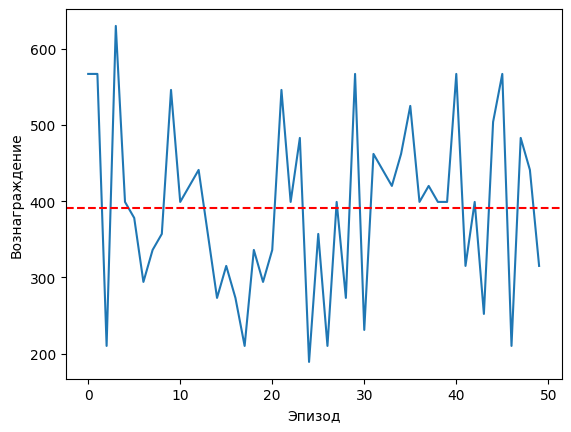

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)
mean_reward = sum(total_rewards) / len(total_rewards)
plt.axhline(mean_reward, color='red', linestyle='--')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [ ]:
_, frames = run_episode(env, best_weight, record_frames=True)

In [ ]:
output_file = "best_episode_2.mp4"
save_video(frames, output_file, fps=30)
path="/content/best_episode_2.mp4"
clip=VideoFileClip(path)
clip.ipython_display(width=480, maxduration=180)

Запись видео: best_episode_2.mp4
Видео сохранено: best_episode_2.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
